<a href="https://colab.research.google.com/github/YoshifumiMiyagi/KD_ML/blob/main/IP2_shizuoka_chutou_Unsupervised_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
SEED=42
import numpy as np
import pandas as pd
import codecs

In [ ]:
with codecs.open("/content/drive/MyDrive/R5_9_16DB1_Shizuoka_Unsupervised_1st.csv", "r", "Shift-JIS", "ignore") as file:
    df = pd.read_table(file, delimiter=",")

In [ ]:
df.columns

Index(['施設', 'ID', 'Age (y)', 'Age (m)', 'Age', 'Age_0:4_1:7_2:8', 'Length',
       'Weight', 'sex', '5th Criteria count', '5th Criteria count_1',
       'BCG_non0_posi1', 'Onset date', 'Treat date',
       'TreatAre_0:before_1:2011_2:2016', 'Season', 'Treat day',
       'IVIG-non-responder_1', 'Non_responder_0_1_first_2_second',
       'IVIG_first', '2nd_line', '3nd Tx', '4nd Tx', 'PSLnon0_use1',
       'IFX_non0_use1', 'preWBC_1', 'postWBC_1', 'FC_WBC', 'preNetro',
       'post Netro', 'FC_Ne', 'pre_Lym', 'post_Lym', 'N_L_ratio', 'preCRP_1',
       'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt', 'N_P_ratio',
       'preTbil', 'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST',
       'preALT', 'postALT', 'FC_ALT', 'preNa@', 'postNa@', 'FC_Na', 'preIgG',
       'postIgG', 'FC_IgG'],
      dtype='object')

In [ ]:
df = df.loc[:,['Age', 'Length', 'Weight', 'sex', '5th Criteria count_1', 'Season', 'Treat day',
       'IVIG-non-responder_1', 'IVIG_first',
       'preWBC_1',  'preNetro',  'pre_Lym', 'preCRP_1', 'prePlt','preTbil','preAST', 'preALT', 'preNa@', 'preIgG']]
df.columns = ['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season','Treat day',
       'IVIG-nonres', '1st_line',
       'WBC',  'Neutrophil',  'lymphocyte', 'CRP','Plt','Tbil','AST', 'ALT', 'Na', 'IgG']
df['Sex'] = df['Sex'].replace('male',0).replace('female',1)
df['Season'] = df['Season'].replace('Spring',0).replace('Summer',1).replace('Autum',2).replace('Winter',3)

In [ ]:
df_IVIG_res = df[(df['IVIG-nonres'] == 0)&(df['1st_line']=='IVIG')]
df_IVIG_res['Group'] = 1
df_IVIG_nonres = df[(df['IVIG-nonres'] == 1)&(df['1st_line']=='IVIG')]
df_IVIG_nonres['Group'] = 3
df_IVIG_PSL_res = df[(df['IVIG-nonres'] == 0)&(df['1st_line']=='IVIG_PSL')]
df_IVIG_PSL_res['Group'] = 2
df_IVIG_PSL_nonres = df[(df['IVIG-nonres'] == 1)&(df['1st_line']=='IVIG_PSL')]
df_IVIG_PSL_nonres['Group'] = 4
df_IVIG_res.shape, df_IVIG_nonres.shape, df_IVIG_PSL_res.shape, df_IVIG_PSL_nonres.shape

<ipython-input-367-4f48cff4f97b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IVIG_res['Group'] = 1
<ipython-input-367-4f48cff4f97b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_IVIG_nonres['Group'] = 3
<ipython-input-367-4f48cff4f97b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

((908, 20), (213, 20), (89, 20), (10, 20))

In [ ]:
Res = pd.concat([df_IVIG_res,df_IVIG_PSL_res])
Non = pd.concat([df_IVIG_nonres,df_IVIG_PSL_nonres])
Res.shape, Non.shape

((997, 20), (223, 20))

In [ ]:
Res.columns

Index(['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season', 'Treat day',
       'IVIG-nonres', '1st_line', 'WBC', 'Neutrophil', 'lymphocyte', 'CRP',
       'Plt', 'Tbil', 'AST', 'ALT', 'Na', 'IgG', 'Group'],
      dtype='object')

In [ ]:
Dat = pd.concat([Res,Non])
# Dat['NLR'] = Dat['Neutrophil']/Dat['lymphocyte']
# Dat['PLR'] = Dat['Plt']/Dat['lymphocyte']
Dat.columns

Index(['Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season', 'Treat day',
       'IVIG-nonres', '1st_line', 'WBC', 'Neutrophil', 'lymphocyte', 'CRP',
       'Plt', 'Tbil', 'AST', 'ALT', 'Na', 'IgG', 'Group'],
      dtype='object')

In [ ]:
X = Dat.drop('IVIG-nonres',axis=1).drop('1st_line',axis=1).drop('Group',axis=1)
y = Dat['Group']
X.shape, y.shape
# Dy_2 = raw3.loc[:,"Response"]
# # X.shape, y.shape

((1220, 17), (1220,))

Imputation and Standardization

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
imp_mean = IterativeImputer(random_state=SEED)

Dx_2 = X.copy()

A= imp_mean.fit_transform(Dx_2)
A= pd.DataFrame(A)
A.index = Dx_2.index
A.columns = Dx_2.columns

In [ ]:
A_ss = StandardScaler().fit_transform(A)
A_ss = pd.DataFrame(A_ss)
A_ss.index = Dx_2.index
A_ss.columns = Dx_2.columns

# Elbow

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

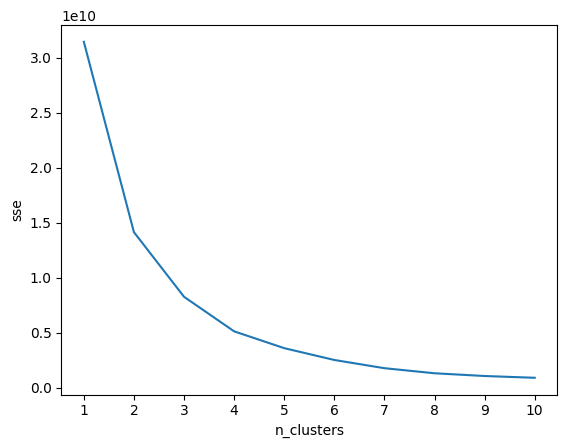

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

SSE = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=SEED)
  kmeans.fit(A)
  SSE.append(kmeans.inertia_)


plt.plot(range(1, 11), SSE)

plt.xlabel('n_clusters')
plt.ylabel('sse')
plt.xticks(range(1,11,1))

plt.show()

In [ ]:
kmeans_model = KMeans(n_clusters = 3).fit(A)
clusters = kmeans_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [406]:
clusters

array([0, 0, 0, ..., 0, 1, 2], dtype=int32)

In [ ]:
k=3
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

Cluster 0: n = 479
Cluster 1: n = 159
Cluster 2: n = 582


# UMAP

In [ ]:
!pip install umap-learn

In [ ]:
import umap.umap_ as umap

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


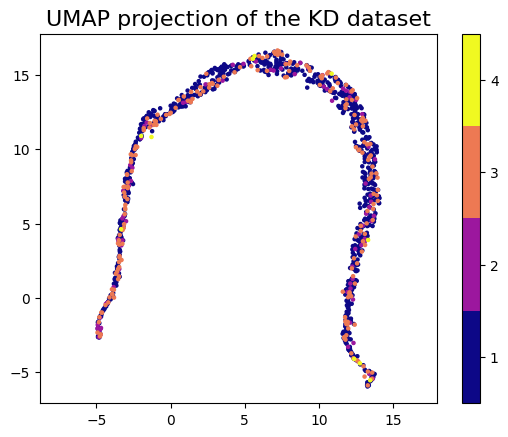

In [ ]:
import matplotlib as mpl
#reducer = umap.UMAP(random_state=SEED, n_neighbors=4,min_dist=0.5,metric='chebyshev')
reducer = umap.UMAP(random_state=SEED, n_neighbors=50,min_dist=0.3,metric='chebyshev')
reducer.fit(A)
embedding = reducer.transform(A)

cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3']

plt.scatter(embedding[:, 0], embedding[:, 1], c=y, cmap='plasma',  s=5)
plt.gca().set_aspect('equal', 'datalim')

plt.title('UMAP projection of the KD dataset', fontsize=16)
#for i, label in enumerate(cluster_names):
#    plt.annotate(label, cluster_centers[i], size=8)

plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))

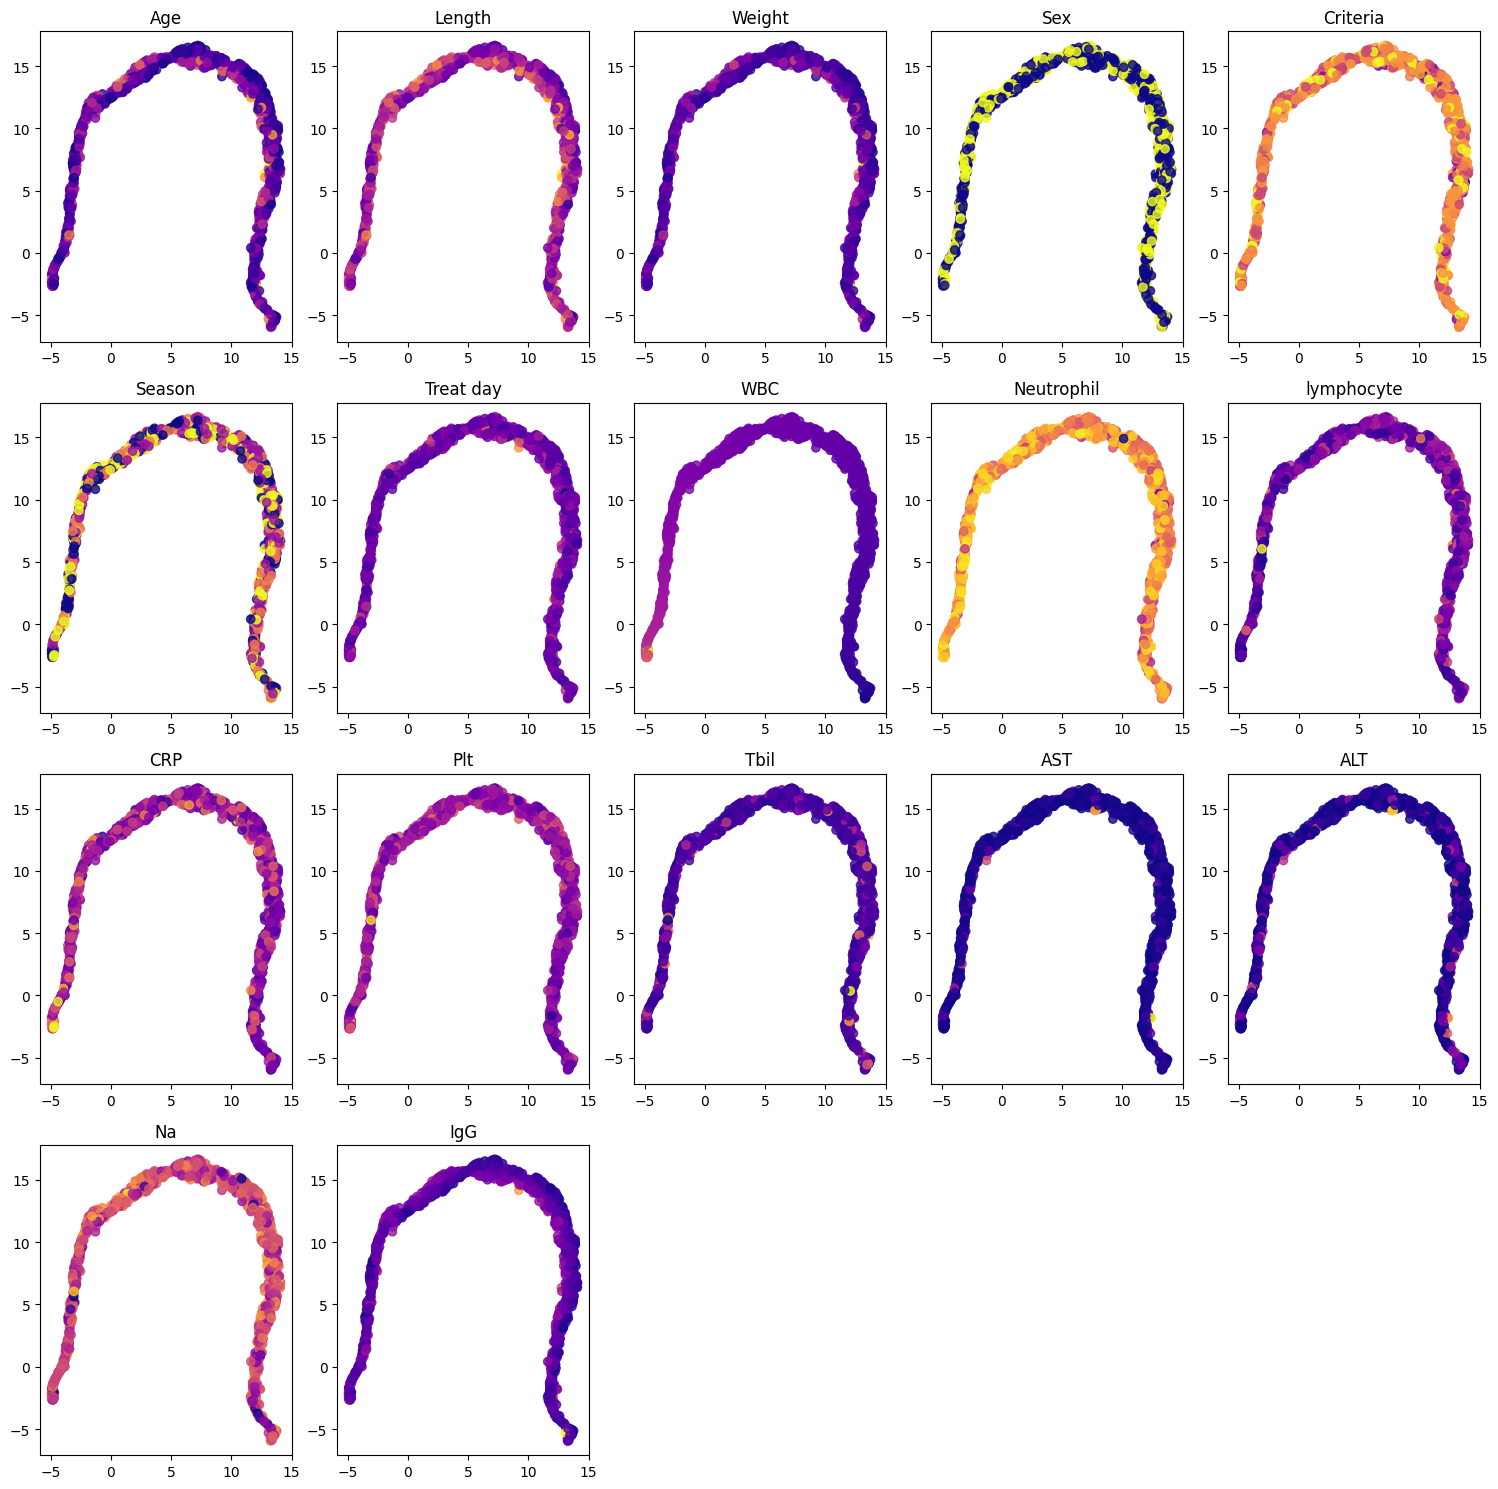

In [ ]:
fig = plt.figure(figsize=(15,15))
cols = A.columns
for i, col in enumerate(cols):
    ax = fig.add_subplot(4, 5, i+1, title=col)
    ax.scatter(embedding[:, 0], embedding[:, 1],
        c=A[col], cmap='plasma', alpha=0.8)
fig.tight_layout()
plt.show()

# Quantification

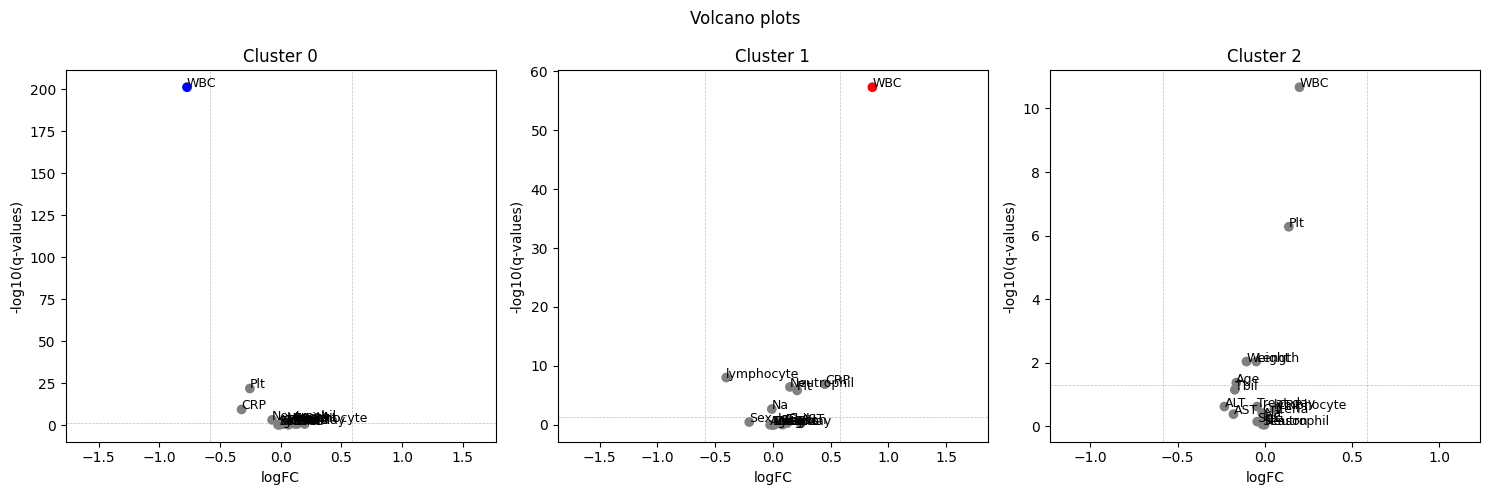

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = A.copy()
df_features_with_clusters['cluster'] = clusters
cols = A.columns

q_threshold = 0.05
fc_threshold = 1.5

fig = plt.figure(figsize=(15,5))

for i in range(k):
    p_values = []
    fcs = []

    for col in cols:

        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)


        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)


    q_values = multipletests(p_values, method='fdr_bh')[1]


    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):

        if q_value < q_threshold and fc > fc_threshold:
            colors.append('red')

        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('blue')

        else:
            colors.append('gray')

    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)

    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1])
    ax.set_ylim(ax.get_ylim())


    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)


    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()

# Other

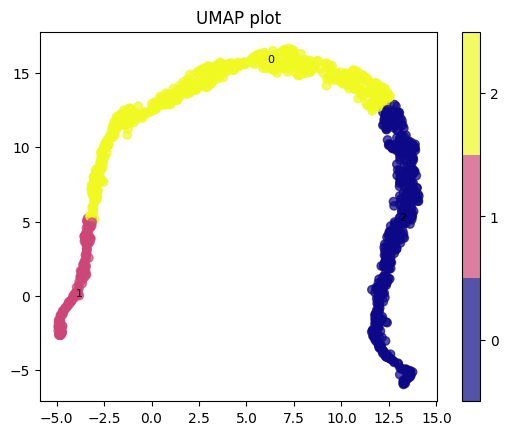

In [ ]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['0', '1','2']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=clusters, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')
for i, label in enumerate(cluster_names):
    plt.annotate(label, cluster_centers[i], size=8)
plt.colorbar(boundaries=np.arange(0,4,1)-0.5).set_ticks(np.arange(0,3,1))
plt.show()

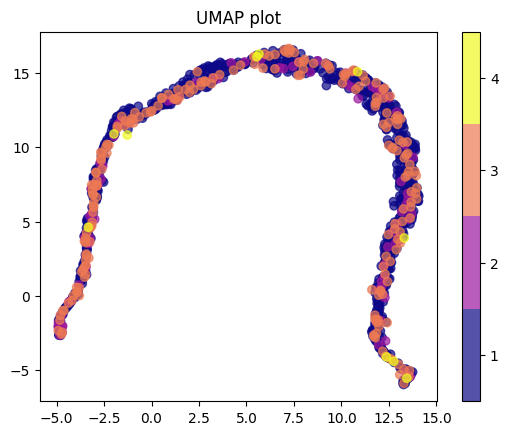

In [ ]:
cluster_centers = reducer.transform(kmeans.cluster_centers_)
cluster_names = ['1', '2','3','4']

plt.scatter(embedding[:, 0], embedding[:, 1],
    c=y, cmap='plasma', alpha=0.7)
plt.title('UMAP plot')



plt.colorbar(boundaries=np.arange(1,6,1)-0.5).set_ticks(np.arange(1,5,1))
plt.show()

In [ ]:
B = df_features_with_clusters.copy()
B['Group'] = y

In [ ]:
B[B['cluster']==0]["Group"].value_counts(),B[B['cluster']==1]["Group"].value_counts(),B[B['cluster']==2]["Group"].value_counts()

(Group
 1    373
 3     74
 2     28
 4      4
 Name: count, dtype: int64,
 Group
 1    103
 3     34
 2     21
 4      1
 Name: count, dtype: int64,
 Group
 1    432
 3    105
 2     40
 4      5
 Name: count, dtype: int64)

In [ ]:
import scipy.stats as st
df = pd.DataFrame([[373,103,432],
                   [74,34,105]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.08821984625723309


In [ ]:
df = pd.DataFrame([[28,21,40],
                   [4,1,5]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.6061900078486826


# Shizuoka+Chutou

'Age', 'Length', 'Weight', 'Sex', 'Criteria', 'Season',
       'Treat day',
       'IVIG-nonres', 'Second_line_nonres', 'PSL_use1', 'IFX_use1',         
       'WBC',  'Neutrophil',  'lymphocyte', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG'

In [ ]:
raw2 = pd.read_csv("/content/drive/MyDrive/iwashima_project_2.csv", encoding='cp932')
add = pd.read_csv("/content/drive/MyDrive/Dr.Miyagi_R6_5_31_DB_1_add.csv", encoding='cp932')

raw2.columns

Index(['ID', 'Age (y)', 'Age (m)', 'Age', 'Length', 'Weight', 'sex',
       '5th Criteria count', 'Onset date', 'Treat day', 'PSL_no_0,1',
       'IVIG-non-responder', 'Response', 'preWBC_1', 'postWBC_1', 'FC_WBC',
       'preNetro', 'post Netro', 'pre_Lym', 'post_Lym', 'preN_Lratio',
       'preCRP_1', 'postCRP_1', 'FC_CRP', 'prePlt', 'postPlt', 'FC_Plt',
       'preTbil', 'postTbil', 'FC_Tbil', 'preAST', 'postAST', 'FC_AST',
       'preALT', 'postALT', 'FC_ALT', 'preNa', 'postNa', 'FC_Na', 'preIgG',
       'postIgG', 'preBNP', 'postBNP', 'prePCT', 'postPCT', 'admit_day',
       'ent_day', 'MAX_KT', 'MIN_KT', 'D_KT', 'Finish_KT', 'End_time',
       'Treat date', 'Ara', 'AfterIVIG37.5(0.1)', 'startKT', 'Last_rate',
       'Last_KT', 'Achieve_rate', 'Achieve_KT', 'Last_time', 'Achieve_time',
       'Achieve_time_categoly'],
      dtype='object')

In [ ]:
raw3 = pd.merge(raw2.T, add.T, left_index=True, right_index=True).T

raw3_2 = raw3.loc[:,['Age', 'Length', 'Weight', 'sex', '5th Criteria count',
       'Treat day', 'preWBC_1',  'preNetro',  'pre_Lym', 'preCRP_1',
       'prePlt','preTbil','preAST', 'preALT', 'preNa', 'preIgG']]
raw3_2.columns = ['Age', 'Length', 'Weight', 'sex', 'Criteria',
       'Treat day', 'WBC',  'Neutrophil',  'lymphocyte', 'CRP',
       'Plt','Tbil','AST', 'ALT', 'Na', 'IgG']
raw3_2['sex'] = raw3_2['sex'].replace('F',0).replace('M',1).replace('female',0).replace('male',1)
Dx_2 = raw3_2
Dy_2 = raw3.loc[:,"Response"]

In [ ]:
X

,Age,Length,Weight,Sex,Criteria,Season,Treat day,WBC,Neutrophil,lymphocyte,CRP,Plt,Tbil,AST,ALT,Na,IgG
0,2.166667,83.0,11.00,0,4.0,1.0,7.0,4500.0,61.0,NaN,0.13,21.2,0.2,60.0,12.0,132.0,NaN
1,1.000000,74.0,8.80,1,4.0,3.0,5.0,7700.0,57.0,30.0,0.13,34.3,NaN,51.0,14.0,138.0,NaN
2,0.833333,74.8,9.10,0,3.0,1.0,7.0,8500.0,42.0,37.0,0.14,44.9,1.8,70.0,181.0,139.0,514.0
3,2.083333,87.0,11.00,1,5.0,1.0,6.0,8200.0,9.4,NaN,0.18,13.6,0.3,42.0,15.0,135.0,NaN
4,1.083333,71.0,8.60,0,4.0,0.0,4.0,14200.0,43.5,44.5,0.18,55.6,0.6,88.0,376.0,137.0,538.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,0.250000,55.0,7.10,1,4.0,2.0,3.0,10450.0,76.0,18.5,12.70,33.5,1.6,147.0,135.0,136.0,NaN
1003,0.916667,76.0,10.00,1,4.0,0.0,4.0,14600.0,69.0,25.0,13.45,20.6,0.9,190.0,81.0,134.0,465.0
1004,0.916667,76.0,10.05,1,4.0,0.0,4.0,14600.0,64.3,29.0,13.45,20.6,0.9,190.0,81.0,134.0,NaN
1019,2.333333,87.0,12.00,0,4.0,3.0,3.0,19900.0,89.0,9.0,14.00,41.1,1.9,71.0,225.0,126.0,749.0


In [ ]:
Dat2 = Dx_2.copy()
# Dat2['NLR'] = Dat2['Neutrophil']/Dat2['lymphocyte']
# Dat2['PLR'] = Dat2['Plt']/Dat2['lymphocyte']

In [ ]:
DF = pd.concat([X,Dat2],join='inner')
DF.shape  ,DF.columns

((1594, 15),
 Index(['Age', 'Length', 'Weight', 'Criteria', 'Treat day', 'WBC', 'Neutrophil',
        'lymphocyte', 'CRP', 'Plt', 'Tbil', 'AST', 'ALT', 'Na', 'IgG'],
       dtype='object'))

In [ ]:
X.shape

(1220, 17)

In [ ]:
pd.DataFrame(y).value_counts()

Group
1        908
3        213
2         89
4         10
Name: count, dtype: int64

In [ ]:
Dy_2.value_counts()

Response
1    226
2    105
3     30
4     13
Name: count, dtype: int64

In [ ]:
DF_y = pd.concat([y,Dy_2])
DF_y.columns = ['Group']
DF_y.value_counts()

1    1134
3     243
2     194
4      23
Name: count, dtype: int64

In [ ]:
imp_mean = IterativeImputer(random_state=SEED)
A= imp_mean.fit_transform(DF)
A= pd.DataFrame(A)
A.index = DF.index
A.columns = DF.columns

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

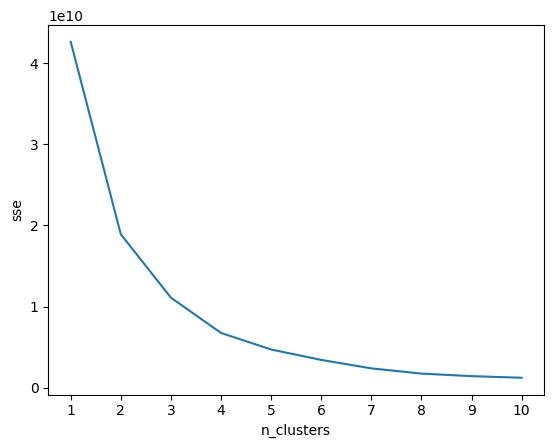

In [ ]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(A)
  SSE.append(kmeans.inertia_)


plt.plot(range(1, 11), SSE)

plt.xlabel('n_clusters')
plt.ylabel('sse')
plt.xticks(range(1,11,1))

plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters = 3).fit(A)
clusters = kmeans_model.labels_

k=3
for i in range(k):
    num = list(clusters).count(i)
    print(f'Cluster {i}: n = {num}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0: n = 627
Cluster 1: n = 757
Cluster 2: n = 210


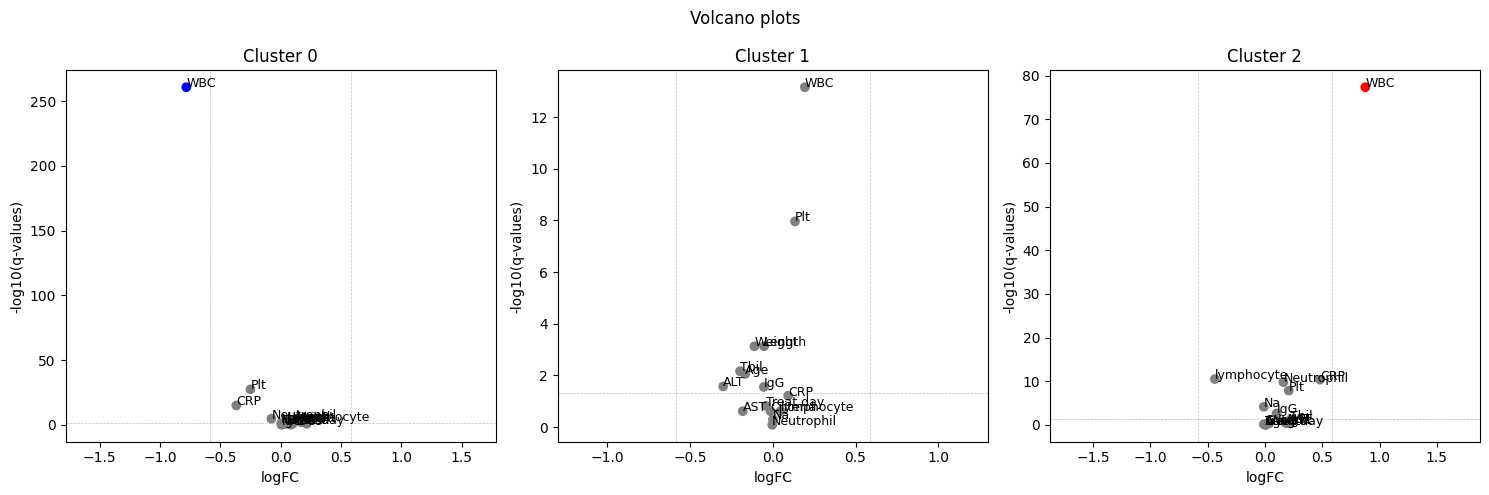

In [ ]:
import numpy as np
from scipy import stats
from statsmodels.stats.multitest import multipletests

df_features_with_clusters = A.copy()
df_features_with_clusters['cluster'] = clusters
cols = A.columns

q_threshold = 0.05
fc_threshold = 1.5

fig = plt.figure(figsize=(15,5))

for i in range(k):
    p_values = []
    fcs = []

    for col in cols:

        group_1 = df_features_with_clusters[df_features_with_clusters['cluster'] == i][col]
        group_2 = df_features_with_clusters[df_features_with_clusters['cluster'] != i][col]
        p_value = stats.ttest_ind(group_1, group_2, equal_var=False)[1]
        p_values.append(p_value)


        fc = group_1.mean()/group_2.mean()
        fcs.append(fc)


    q_values = multipletests(p_values, method='fdr_bh')[1]


    colors = []
    for col, q_value, fc in zip(cols, q_values, fcs):

        if q_value < q_threshold and fc > fc_threshold:
            colors.append('red')

        elif q_value < q_threshold and fc < 1/fc_threshold:
            colors.append('blue')

        else:
            colors.append('gray')

    ax = fig.add_subplot(1,3,i+1)
    ax.scatter(np.log2(fcs), -np.log10(q_values),
    c=colors)

    max_val = max(abs(np.nanmin(np.log2(fcs)[np.log2(fcs) != -np.inf])), max(np.log2(fcs)))
    ax.set_xlim([-max_val-1, max_val+1])
    ax.set_ylim(ax.get_ylim())


    ax.hlines([-np.log10(q_threshold)], -max_val-1, max_val+1, 'gray', 'dashed', linewidth=0.5, alpha=0.5)
    ax.vlines([np.log2(fc_threshold), np.log2(1/fc_threshold)], ax.get_ylim()[0], ax.get_ylim()[1], 'gray', 'dashed', linewidth=0.5, alpha=0.5)


    ax.set_title(f'Cluster {i}')
    ax.set_xlabel('logFC')
    ax.set_ylabel('-log10(q-values)')
    for j, label in enumerate(cols):
        ax.annotate(label, (np.log2(fcs)[j], -np.log10(q_values)[j]), size=9)

fig.suptitle('Volcano plots')
fig.tight_layout()
plt.show()

In [ ]:
B = df_features_with_clusters.copy()
B['Group'] = DF_y

In [ ]:
B[B['cluster']==0]["Group"].value_counts(),B[B['cluster']==1]["Group"].value_counts(),B[B['cluster']==2]["Group"].value_counts()

(Group
 1    470
 3     85
 2     63
 4      9
 Name: count, dtype: int64,
 Group
 1    542
 3    116
 2     89
 4     10
 Name: count, dtype: int64,
 Group
 1    122
 2     42
 3     42
 4      4
 Name: count, dtype: int64)

In [408]:
df = pd.DataFrame([[470,542,122],
                   [85,116,42]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.00989446726723563


In [407]:
df = pd.DataFrame([[63,89,42],
                   [9,10,4]])
x2, p1, dof, e = st.chi2_contingency(df,correction=False)

print(p1)

0.788057670076737


In [410]:
df = pd.DataFrame([[470,542],[85,116]])
x2, p1, dof, e = st.chi2_contingency(df,correction=True)
adj_p = p1*3
print(adj_p)

0.948613391681191


In [411]:
df = pd.DataFrame([[470,122],[85,42]])
x2, p1, dof, e = st.chi2_contingency(df,correction=True)
adj_p = p1*3
print(adj_p)

0.010478451396322561


In [412]:
df = pd.DataFrame([[542,122],[116,42]])
x2, p1, dof, e = st.chi2_contingency(df,correction=True)
adj_p = p1*3
print(adj_p)

0.08135470224819066
